In [1]:
#!pip install mysqlclient
#!pip install bellmanford
#!pip install networkx
#!conda install -c anaconda networkx 

In [2]:
from tqdm import tqdm
import MySQLdb as MySQLdb
import ast
import numpy as np
from ArbitrageGraph import ArbitrageGraph
#from ExchangeFeeStore import ExchangeFeeStore
import pandas as pd

In [3]:
arbitrageGraph = ArbitrageGraph(edgeTTL=5)
#exchangeFeeStore = ExchangeFeeStore()

In [4]:
sql="SELECT exchange, pair, bids, asks, id, orderbook_time FROM orderbook WHERE exchange IN ('coinfloor','kraken','bitfinex','bittrex','gdax','bitstamp','coinbase','poloniex') ORDER BY ID LIMIT 1000;"

In [5]:
db = MySQLdb.connect(
    host="orderbook.cyifbgm0zwt0.eu-west-2.rds.amazonaws.com",
    user="admin",
    passwd="123Qwe123Qwe",
    db="orderbook",
    port=3306)
cursor = db.cursor()
nof_rows=cursor.execute(sql)

In [6]:
df = pd.DataFrame(columns=['id','length','profit_perc','nodes','edges'])

In [7]:
#for row in tqdm(cursor.fetchall()):
for row in tqdm(cursor):
    exchangename = row[0]
    symbol = row[1]
    bids_str = row[2]
    asks_str = row[3]
    id_str = int(row[4])
    timestamp = float(row[5])
    #import ipdb; ipdb.set_trace()
    try:
        l_ask = float(ast.literal_eval(asks_str)[0][0])
        h_bid = float(ast.literal_eval(bids_str)[0][0])
        #print("%s,%s,%f,%f,%d,%f" % (exchangename, symbol, h_bid, l_ask,id_str,timestamp))
        length, nodes, negative_cycle = arbitrageGraph.update_point(
            symbol,
            exchangename,
            0.0026, #exchangeFeeStore.getTakerFee(exchangename,symbol),
            l_ask,
            h_bid,
            timestamp)
        
        if negative_cycle == True:
            edges=arbitrageGraph.nodeslist_to_edges(nodes)
            df=df.append(pd.DataFrame([[int(id_str),length,np.exp(-length)*100-100,",".join(str(x) for x in nodes),",".join(str(x) for x in edges)]], columns=['id','length','profit_perc','nodes','edges']),ignore_index=True)
            #print("length:",length,"ratio",np.exp(-length),'nodes',nodes,'edges',edges)
            #arbitrageGraph.plot_graph()
    except IndexError:
        print("*** Invalid orderbook ***")


8it [00:00, 79.68it/s]

bitfinex,BTC/USDT,7603.100000,7603.200000,3,1533167846.756820
coinfloor,BTC/USD,7372.000000,7824.000000,7,1533167847.550440
gdax,BTC/USD,7602.630000,7602.640000,11,1533167848.025920
bitstamp,BTC/USD,7603.680000,7606.200000,20,1533167843000.000000
bittrex,BTC/USD,7563.721000,7651.298000,37,1533167854.448070
coinfloor,BTC/USD,7372.000000,7824.000000,46,1533167855.596620
bitfinex,BTC/USDT,7603.100000,7603.200000,50,1533167856.143610
poloniex,BTC/USDT,7602.964801,7608.000000,58,1533167857.190350
bitstamp,ETH/USD,419.060000,419.670000,61,1533167851000.000000
gdax,ETH/USD,418.990000,419.000000,74,1533167860.644050
kraken,BTC/USD,7602.900000,7603.000000,87,1533167864.116780
coinfloor,BTC/USD,7372.000000,7824.000000,93,1533167865.026040
bittrex,ETH/USD,417.279000,423.882000,101,1533167865.930190


31it [00:00, 73.12it/s]

bitstamp,BTC/USD,7603.690000,7606.190000,106,1533167858000.000000
poloniex,BTC/USDT,7602.964802,7608.000000,123,1533167869.545740
bitfinex,BTC/USDT,7603.100000,7603.200000,124,1533167869.679690
gdax,BTC/USD,7602.630000,7602.640000,129,1533167870.316880
coinfloor,BTC/USD,7372.000000,7824.000000,141,1533167871.860910
bitstamp,ETH/USD,419.060000,419.670000,152,1533167863000.000000
bittrex,BTC/USD,7563.721000,7651.298000,159,1533167874.715230
kraken,ETH/USD,419.130000,419.140000,169,1533167875.836210
bitfinex,BTC/USDT,7605.800000,7605.900000,174,1533167876.594190
poloniex,BTC/USDT,7602.964802,7608.000000,178,1533167877.138640
gdax,ETH/USD,418.990000,419.000000,188,1533167878.394000
bitstamp,ETH/USD,419.070000,419.670000,197,1533167877000.000000
coinfloor,BTC/USD,7372.000000,7824.000000,202,1533167880.898250
bitfinex,BTC/USDT,7605.800000,7605.900000,218,1533167882.906020
bittrex,ETH/USD,417.279000,423.241000,219,1533167883.015780
poloniex,BTC/USDT,7599.183363,7608.000000,232,1533167884.5765

55it [00:00, 80.88it/s]

bitstamp,BTC/USD,7603.030000,7606.190000,336,1533167887000.000000
coinfloor,BTC/USD,7372.000000,7824.000000,343,1533167900.865340
poloniex,BTC/USDT,7599.183464,7608.000000,347,1533167901.292650
bitfinex,BTC/USDT,7605.800000,7605.900000,353,1533167901.956990
bittrex,ETH/USD,417.279000,423.241000,362,1533167902.982520
gdax,ETH/USD,419.070000,419.080000,378,1533167904.792750
bitstamp,ETH/USD,419.060000,419.670000,381,1533167897000.000000
coinfloor,BTC/USD,7372.000000,7824.000000,398,1533167908.112040
bitfinex,BTC/USDT,7606.400000,7606.500000,399,1533167908.248220
poloniex,BTC/USDT,7599.183564,7608.000000,411,1533167909.538590
kraken,ETH/USD,419.180000,419.260000,412,1533167909.649930
bittrex,BTC/USDT,7595.000000,7600.000000,423,1533167911.031020
bitstamp,BTC/USD,7603.030000,7606.190000,426,1533167898000.000000
gdax,BTC/USD,7603.990000,7604.000000,438,1533167913.662520
coinfloor,BTC/USD,7372.000000,7824.000000,443,1533167914.657460
bitfinex,BTC/USDT,7606.400000,7609.000000,446,1533167915.0

78it [00:00, 81.96it/s]

bitstamp,BTC/USD,7604.620000,7606.190000,516,1533167906000.000000
poloniex,BTC/USDT,7603.767000,7619.000000,529,1533167926.246610
coinfloor,BTC/USD,7372.000000,7824.000000,535,1533167927.274990
bitfinex,BTC/USDT,7610.900000,7611.000000,536,1533167927.389870
bittrex,ETH/USD,417.279000,423.241000,540,1533167927.913140
gdax,BTC/USD,7603.990000,7604.000000,552,1533167930.245940
kraken,ETH/USD,419.390000,419.810000,557,1533167930.826610
bitstamp,ETH/USD,419.230000,420.050000,558,1533167921000.000000
coinfloor,BTC/USD,7372.000000,7824.000000,578,1533167933.821430
bitfinex,BTC/USDT,7610.900000,7611.000000,591,1533167935.350790
poloniex,BTC/USDT,7604.992039,7616.017391,592,1533167935.477810
bittrex,BTC/USDT,7600.000000,7607.364100,595,1533167935.889530
bitstamp,BTC/USD,7604.550000,7606.840000,604,1533167928000.000000
gdax,ETH/USD,419.520000,419.530000,609,1533167938.218210
coinfloor,BTC/USD,7372.000000,7824.000000,617,1533167939.623600
kraken,BTC/USD,7604.000000,7605.200000,634,1533167941.6865

101it [00:01, 83.99it/s]

bitstamp,BTC/USD,7604.610000,7606.830000,689,1533167941000.000000
bitfinex,BTC/USDT,7609.300000,7609.400000,690,1533167949.711270
bittrex,ETH/USD,417.279000,423.240000,709,1533167952.572230
coinfloor,BTC/USD,7372.000000,7824.000000,716,1533167953.332270
kraken,ETH/USD,419.420000,419.800000,721,1533167953.964090
gdax,ETH/USD,419.590000,419.600000,729,1533167954.840090
bitstamp,ETH/USD,419.550000,420.000000,734,1533167947000.000000
poloniex,BTC/USDT,7604.992040,7615.837469,736,1533167955.867080
bitfinex,BTC/USDT,7608.700000,7608.800000,747,1533167957.512860
coinfloor,BTC/USD,7372.000000,7824.000000,765,1533167959.795170
bittrex,BTC/USDT,7591.178800,7607.512800,767,1533167960.123140
gdax,BTC/USD,7603.990000,7604.000000,781,1533167962.018060
bitstamp,BTC/USD,7604.610000,7606.830000,784,1533167950000.000000
bitfinex,BTC/USDT,7606.800000,7608.800000,791,1533167964.380220
poloniex,BTC/USDT,7604.992039,7615.837468,802,1533167965.689240
kraken,BTC/USD,7604.100000,7605.500000,803,1533167965.8229

375it [00:01, 247.21it/s]


coinfloor,BTC/USD,7372.000000,7824.000000,1377,1533168048.132970
bitfinex,BTC/USDT,7606.600000,7606.700000,1378,1533168048.234210
poloniex,BTC/USDT,7604.992039,7611.680323,1385,1533168049.058680
kraken,BTC/USD,7603.300000,7603.700000,1407,1533168051.752120
coinfloor,BTC/USD,7372.000000,7824.000000,1415,1533168053.308040
bittrex,BTC/USD,7572.515000,7639.000000,1419,1533168053.757790
bitfinex,BTC/USDT,7606.600000,7606.700000,1421,1533168053.975200
gdax,BTC/USD,7602.000000,7602.010000,1430,1533168055.293940
poloniex,BTC/USDT,7604.992039,7611.696254,1444,1533168056.972000
coinfloor,BTC/USD,7372.000000,7824.000000,1453,1533168058.175140
bittrex,ETH/USD,417.279000,419.920000,1461,1533168059.169200
kraken,ETH/USD,419.650000,419.780000,1470,1533168060.717770
bitfinex,BTC/USDT,7606.600000,7606.700000,1474,1533168061.276310
gdax,ETH/USD,419.680000,419.690000,1480,1533168062.080160
coinfloor,BTC/USD,7372.000000,7824.000000,1495,1533168063.851830
poloniex,BTC/USDT,7604.992039,7611.680323,1509,153

699it [00:01, 384.46it/s]


poloniex,BTC/USDT,7606.814269,7615.706446,3318,1533168321.952240
coinfloor,BTC/USD,7372.000000,7824.000000,3335,1533168325.086550
bitfinex,BTC/USDT,7615.300000,7615.500000,3339,1533168325.519300
gdax,ETH/USD,419.990000,420.000000,3353,1533168327.823210
kraken,BTC/USD,7603.900000,7604.000000,3354,1533168327.934610
bittrex,ETH/USD,414.318000,420.235000,3362,1533168329.202400
coinfloor,BTC/USD,7372.000000,7824.000000,3373,1533168331.845550
bitfinex,BTC/USDT,7615.100000,7615.400000,3374,1533168331.950860
poloniex,BTC/USDT,7606.814370,7615.706446,3377,1533168332.336880
coinfloor,BTC/USD,7372.000000,7824.000000,3406,1533168338.251410
bitfinex,BTC/USDT,7615.500000,7615.900000,3408,1533168338.470530
bittrex,BTC/USDT,7599.000000,7610.000000,3420,1533168340.083590
gdax,BTC/USD,7605.010000,7605.020000,3434,1533168341.611030
poloniex,BTC/USDT,7606.814370,7615.706446,3437,1533168341.934450
kraken,ETH/USD,420.090000,420.100000,3439,1533168342.155600
coinfloor,BTC/USD,7372.000000,7824.000000,3450,15

885it [00:02, 432.86it/s]


bittrex,BTC/USDT,7592.010000,7625.300000,5731,1533168658.240020
bitfinex,BTC/USDT,7607.200000,7607.300000,5739,1533168659.145510
coinfloor,BTC/USD,7372.000000,7824.000000,5755,1533168661.601910
gdax,ETH/USD,420.990000,421.000000,5765,1533168662.802010
poloniex,BTC/USDT,7615.000000,7615.010000,5766,1533168662.953290
kraken,ETH/USD,421.530000,421.560000,5767,1533168663.089190
bitfinex,BTC/USDT,7607.900000,7608.000000,5778,1533168664.984560
bittrex,BTC/USD,7572.516000,7639.000000,5780,1533168665.297790
coinfloor,BTC/USD,7372.000000,7824.000000,5785,1533168665.913120
gdax,BTC/USD,7605.870000,7605.880000,5801,1533168667.964580
poloniex,BTC/USDT,7615.000000,7615.010000,5812,1533168669.745430
coinfloor,BTC/USD,7372.000000,7824.000000,5814,1533168669.991270
bitfinex,BTC/USDT,7607.900000,7608.000000,5815,1533168670.133410
bittrex,ETH/USD,418.547000,421.940000,5823,1533168671.143980
kraken,BTC/USD,7603.900000,7604.000000,5831,1533168672.154310
coinfloor,BTC/USD,7372.000000,7824.000000,5843,1533

1000it [00:02, 452.00it/s]


coinfloor,BTC/USD,7379.000000,7824.000000,7221,1533168862.270130
bitfinex,BTC/USDT,7609.900000,7610.000000,7222,1533168862.374790
poloniex,BTC/USDT,7615.063726,7615.680500,7226,1533168862.823510
bittrex,ETH/USD,420.334000,423.030000,7227,1533168862.929550
coinfloor,BTC/USD,7379.000000,7824.000000,7251,1533168866.396060
gdax,ETH/USD,421.990000,422.000000,7259,1533168867.354010
bittrex,BTC/USDT,7592.083107,7626.000000,7262,1533168867.681900
poloniex,BTC/USDT,7615.063726,7615.706446,7267,1533168868.219060
bitfinex,BTC/USDT,7609.900000,7610.000000,7268,1533168868.343830
coinfloor,BTC/USD,7379.000000,7842.000000,7285,1533168870.771240
gdax,BTC/USD,7614.590000,7614.600000,7297,1533168872.225420
bitfinex,BTC/USDT,7609.900000,7610.000000,7301,1533168873.021070
bittrex,BTC/USD,7572.516000,7639.000000,7302,1533168873.129120
coinfloor,BTC/USD,7379.000000,7842.000000,7311,1533168874.140180
poloniex,BTC/USDT,7615.063727,7615.706446,7315,1533168874.576720
gdax,ETH/USD,422.090000,422.100000,7332,153

In [8]:
db.close()

In [9]:
df.head()

,id,length,profit_perc,nodes,edges
0,6614,-0.000586,0.058611,"kraken-USD,bitstamp-USD,bitstamp-ETH,kraken-ET...","0.0,6.042858097147529,0.0,-6.0434440390081585"
1,6624,-0.000586,0.058611,"kraken-USD,bitstamp-USD,bitstamp-ETH,kraken-ET...","0.0,6.042858097147529,0.0,-6.0434440390081585"
2,6631,-0.000586,0.058611,"kraken-USD,bitstamp-USD,bitstamp-ETH,kraken-ET...","0.0,6.042858097147529,0.0,-6.0434440390081585"
3,6632,-0.000586,0.058611,"kraken-USD,bitstamp-USD,bitstamp-ETH,kraken-ET...","0.0,6.042858097147529,0.0,-6.0434440390081585"
4,6635,-0.000586,0.058611,"kraken-USD,bitstamp-USD,bitstamp-ETH,kraken-ET...","0.0,6.042858097147529,0.0,-6.0434440390081585"


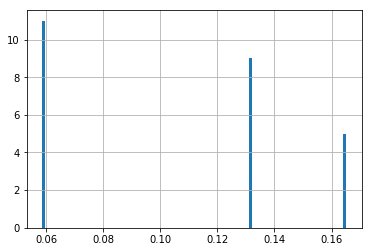

In [10]:
df['profit_perc'].hist(bins=100)

In [11]:
df.to_csv("arbitrage.csv",index=False)